# Imports

In [59]:
import pandas   as pd
import numpy    as np

from matplotlib         import pyplot   as plt
from sklearn            import metrics  as mt
from sklearn            import tree     as tr

# Load Dataset

In [60]:
#Lendo arquivo CSV de Treino
x_train = pd.read_csv('../dataset/class/X_training.csv')
y_train = pd.read_csv('../dataset/class/y_training.csv')

#Lendo arquivo CSV de teste
x_test = pd.read_csv('../dataset/class/X_test.csv')
y_test = pd.read_csv('../dataset/class/y_test.csv')

#Lendo arquivo CSV de Validação
x_val = pd.read_csv('../dataset/class/X_validation.csv')
y_val = pd.read_csv('../dataset/class/y_validation.csv')

In [61]:
#Seleção de Features
features = [  'customer_type', 'age', 'class', 'flight_distance',
              'inflight_wifi_service', 'departure_arrival_time_convenient',
              'ease_of_online_booking', 'gate_location', 'food_and_drink',
              'online_boarding', 'seat_comfort', 'inflight_entertainment',
              'on_board_service', 'leg_room_service', 'baggage_handling',
              'checkin_service', 'inflight_service', 'cleanliness',
              'departure_delay_in_minutes', 'arrival_delay_in_minutes',
              'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
              'type_of_travel_personal_travel']

#Tratamento dos dados
x_train = x_train.loc[:,features]
y_train = y_train.values.ravel()

x_val = x_val.loc[:,features]
y_val = y_val.values.ravel()

x_test = x_test.loc[:,features]
y_test = y_test.values.ravel()

# Model Training - DecisionTree Classifier (Training Data)

In [62]:
max_depth = np.arange(1,40,1)
acc_list = []
prec_list = []
recall_list = []
f1_list = []

for i in max_depth:
    #define
    model_tree = tr.DecisionTreeClassifier(max_depth=i)

    #fit
    model_tree.fit(x_train,y_train)

    #predict
    yhat_train = model_tree.predict(x_train)

    #performance
    acc_list.append(mt.accuracy_score(yhat_train,y_train))
    prec_list.append(mt.precision_score(yhat_train,y_train))
    recall_list.append(mt.recall_score(yhat_train,y_train))
    f1_list.append(mt.f1_score(yhat_train,y_train))

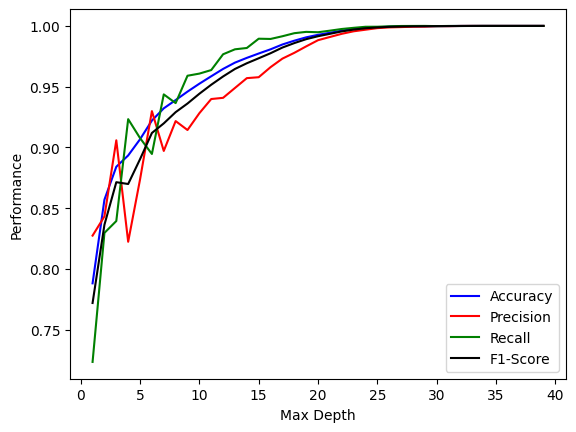

In [63]:
#Plot das métricas de performance em relação ao max_depth
plt.plot(max_depth,acc_list, c='b',label='Accuracy')
plt.plot(max_depth,prec_list, c='r',label='Precision')
plt.plot(max_depth,recall_list,c='g',label='Recall')
plt.plot( max_depth,f1_list,c='black',label='F1-Score')
plt.ylabel('Performance')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [64]:
#Achando melhor valor de max_depth

best_depth=acc_list.index(max(acc_list))
best_depth

33

# Model Training - DecisionTree Classifier (Validation Data)

In [65]:
#define
model_tree = tr.DecisionTreeClassifier(max_depth=best_depth)

#fit
model_tree.fit(x_train,y_train)

#predict
yhat_val = model_tree.predict(x_val)

#performance
acc_val = mt.accuracy_score(yhat_val,y_val)
print(f'Accuracy: {acc_val}')

prec_val = mt.precision_score(yhat_val,y_val)
print(f'Precision: {prec_val}')

recall_val = mt.recall_score(yhat_val,y_val)
print(f'Recall: {recall_val}')

f1_val = mt.f1_score(yhat_val,y_val)
print(f'F1-Score: {f1_val}')


Accuracy: 0.944045818720036
Precision: 0.9403073724849654
Recall: 0.93125
F1-Score: 0.935756769736599


# Model Training - DecisionTree Classifier (Test Data)

In [66]:
#define
model_tree = tr.DecisionTreeClassifier(max_depth=best_depth)

#fit
model_tree.fit( np.concatenate((x_train,x_val)),
                np.concatenate((y_train,y_val)))
                                

#predict
yhat_test = model_tree.predict(x_test)

#performance
acc_test = mt.accuracy_score(yhat_test,y_test)
print(f'Accuracy: {acc_test}')

prec_test = mt.precision_score(yhat_test,y_test)
print(f'Precision: {prec_test}')

recall_test = mt.recall_score(yhat_test,y_test)
print(f'Recall: {recall_test}')

f1_test = mt.f1_score(yhat_test,y_test)
print(f'F1-Score: {f1_test}')

Accuracy: 0.9468968447070637
Precision: 0.9418389793224813
Recall: 0.9374671571203363
F1-Score: 0.9396479831453276


/home/leprado06/.pyenv/versions/ensaio_ML/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [67]:
#Criando dataframe com as métricas do Ensaio
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
training_metrics = [acc_list[best_depth], prec_list[best_depth], recall_list[best_depth], f1_list[best_depth]]
val_metrics = [acc_val, prec_val, recall_val, f1_val]
test_metrics = [acc_test, prec_test, recall_test, f1_test]

mts = pd.DataFrame({    "Treinamento": training_metrics,
                        "Validação": val_metrics,
                        "Teste": test_metrics},index = metrics)

mts

,Treinamento,Validação,Teste
Accuracy,1.0,0.944046,0.946897
Precision,1.0,0.940307,0.941839
Recall,1.0,0.931250,0.937467
F1-Score,1.0,0.935757,0.939648
